## Final Project Submission

Please fill out:
* Student name: Reuben Hough
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Ahbineet Kulkarni
* Blog post URL:


In [1]:
import warnings
import pandas as pd
import sys
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, scale, label_binarize, normalize, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from numpy import random
from contextlib import redirect_stdout
from io import StringIO
from time import time

In [2]:
# warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('cleaneddf.csv', low_memory=False)
test = pd.read_csv('cleantest.csv', low_memory=False)

In [4]:
def display_all(df):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(df)

In [5]:
display_all(train.head())

,id,gps_height,longitude,latitude,basin,region_code,lga,population,public_meeting,permit,extraction_type_class,management,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group,year,month,selfbuilt,NaN Counts
0,69572,1390.0,34.938093,-9.856322,1,10,51,109,1,0,0,7,2,5,1,8,0,1,functional,2011,3,0,25
1,8776,1399.0,34.698766,-2.147466,4,19,103,280,1,1,0,11,0,5,2,5,1,1,functional,2013,3,0,24
2,34310,686.0,37.460664,-3.821329,5,20,108,250,1,1,0,7,4,5,1,0,1,2,functional,2013,2,1,25
3,67743,263.0,38.486161,-11.155298,7,24,87,58,1,1,5,7,0,5,0,3,0,2,non functional,2013,1,0,25
4,19728,1317.0,31.130847,-1.825359,4,17,26,0,1,1,0,1,0,5,3,5,1,1,functional,2011,7,1,24


In [6]:
train['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [7]:
# I'll now encode the status group, making sure to note
# which number refers to which status
le = LabelEncoder().fit(train['status_group'])
train['status_group'] = le.transform(train['status_group'])

It encoded "functional" as 0, "functional needs repair" as 1, and "non functional" as 2. Another useful way to encode the labels is by turning them into zeros and ones.

In [8]:
train.head()

,id,gps_height,longitude,latitude,basin,region_code,lga,population,public_meeting,permit,...,water_quality,quantity,source,source_class,waterpoint_type,status_group,year,month,selfbuilt,NaN Counts
0,69572,1390.0,34.938093,-9.856322,1,10,51,109,1,0,...,5,1,8,0,1,0,2011,3,0,25
1,8776,1399.0,34.698766,-2.147466,4,19,103,280,1,1,...,5,2,5,1,1,0,2013,3,0,24
2,34310,686.0,37.460664,-3.821329,5,20,108,250,1,1,...,5,1,0,1,2,0,2013,2,1,25
3,67743,263.0,38.486161,-11.155298,7,24,87,58,1,1,...,5,0,3,0,2,2,2013,1,0,25
4,19728,1317.0,31.130847,-1.825359,4,17,26,0,1,1,...,5,3,5,1,1,0,2011,7,1,24


In [9]:
names = ["functional", "functional needs repair", "non functional"]

In [10]:
y = train['status_group']
x = train.drop(['status_group', 'id'], axis=1)

In [11]:
# There are four times as many entries in the train set, 
# so I'll use .20 when testing classification
train.shape[0]/test.shape[0]

4.0

In [12]:
# Doing a test/train split on the training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=8)
w = x_train, x_test, y_train, y_test

In [13]:
data = pd.get_dummies(train,prefix=['status'], columns = ['status_group'], drop_first=False)

In [14]:
data0 = data.copy()
data1 = data.copy()
data2 = data.copy()

In [15]:
# Making dataframes with only one status accounted for
data0.drop(['status_1', 'status_2'], axis=1, inplace=True)
data1.drop(['status_0', 'status_2'], axis=1, inplace=True)
data2.drop(['status_0', 'status_1'], axis=1, inplace=True)

In [16]:
y0 = data0['status_0']
x0 = data0.drop(['status_0', 'id'], axis=1)
y1 = data1['status_1']
x1 = data1.drop(['status_1', 'id'], axis=1)
y2 = data2['status_2']
x2 = data2.drop(['status_2', 'id'], axis=1)

In [17]:
x0train, x0test, y0train, y0test = train_test_split(x0, y0, test_size=0.20, random_state=8)
x1train, x1test, y1train, y1test = train_test_split(x1, y1, test_size=0.20, random_state=8)
x2train, x2test, y2train, y2test = train_test_split(x2, y2, test_size=0.20, random_state=8)

In [18]:
w0 = x0train, x0test, y0train, y0test
w1 = x1train, x1test, y1train, y1test
w2 = x2train, x2test, y2train, y2test
w3 = w0, w1, w2

In [19]:
def findauc(w):
    max_depths = np.linspace(1, 32, 32, endpoint=True)
    train_results0 = []
    train_results1 = []
    train_results2 = []
    train_results3 = []
    test_results0 = []
    test_results1 = []
    test_results2 = []
    test_results3 = []
    for max_depth in max_depths:
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=8)
        dt.fit(w[0][0], w[0][2])
        dt.fit(w[1][0], w[1][2])
        dt.fit(w[2][0], w[2][2])
        train_pred0 = dt.predict(w[0][0])
        train_pred1 = dt.predict(w[1][0])
        train_pred2 = dt.predict(w[2][0])
        false_positive_rate0, true_positive_rate0, thresholds0 = roc_curve(w[0][2], train_pred0)
        false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(w[1][2], train_pred1)
        false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(w[2][2], train_pred2)
        roc_auc0 = auc(false_positive_rate0, true_positive_rate0)
        roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
        roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
        # Add auc score to previous train results
        train_results0.append(roc_auc0)
        train_results1.append(roc_auc1)
        train_results2.append(roc_auc2)
        train_results3.append(roc_auc0 + roc_auc1 + roc_auc2)
        y_pred0 = dt.predict(w[0][1])
        y_pred1 = dt.predict(w[1][1])
        y_pred2 = dt.predict(w[2][1])
        false_positive_rate0, true_positive_rate0, thresholds0 = roc_curve(w[0][3], y_pred0)
        false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(w[1][3], y_pred1)
        false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(w[2][3], y_pred2)
        roc_auc0 = auc(false_positive_rate0, true_positive_rate0)
        roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
        roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
        # Add auc score to previous test results
        test_results0.append(roc_auc0)
        test_results1.append(roc_auc1)
        test_results2.append(roc_auc2)
        test_results3.append(roc_auc0 + roc_auc1 + roc_auc2)
    plt.figure(figsize=(12,6))
    plt.plot(max_depths, train_results0, 'b', label='Needs Repair Train AUC')
    plt.plot(max_depths, test_results0, 'cornflowerblue', label='Needs Repair Test AUC')
    plt.plot(max_depths, train_results1, 'r', label='Non Functional Train AUC')
    plt.plot(max_depths, test_results1, 'firebrick', label='Non Functional Test AUC')
    plt.plot(max_depths, train_results2, 'g', label='Functional Train AUC')
    plt.plot(max_depths, test_results2, 'lime', label='Functional Test AUC')
    plt.plot(max_depths, train_results3, 'black', label='Total Train AUC')
    plt.plot(max_depths, test_results3, 'dimgray', label='Total Test AUC')
    plt.ylabel('AUC score')
    plt.xlabel('Tree depth')
    plt.legend()
    plt.show()

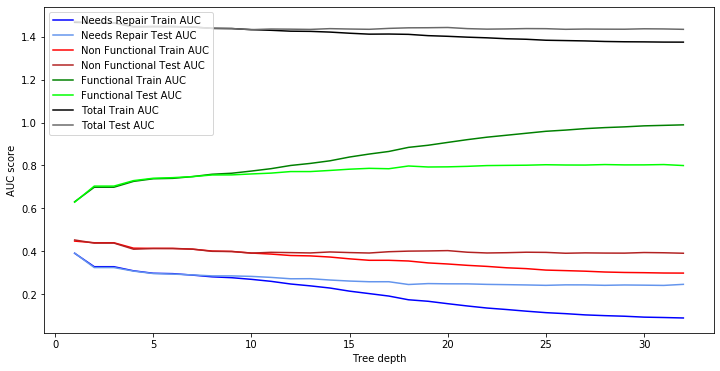

In [20]:
findauc(w3)

In [21]:
# Naming each classifier I'm going to use
classifiers = [RidgeClassifier(),XGBClassifier(),KNeighborsClassifier(),
              RandomForestClassifier(),AdaBoostClassifier(),
              GradientBoostingClassifier(), DecisionTreeClassifier()]

In [22]:
def statistics(clf, w):
    print('_' * 78)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(w[0], w[2])
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(w[1])
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(w[3], pred)
    print("accuracy:   %0.3f" % score)

    matrix = metrics.confusion_matrix(w[3], pred)
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time, matrix

In [23]:
results = []
for clf in classifiers:
    results.append(statistics(clf, w))

______________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)
train time: 0.041s
test time:  0.004s
accuracy:   0.615

______________________________________________________________________________
Training: 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
train time: 6.328s
test time:  0.081s
accuracy:   0.741

________________________________________________

C:\Users\reube\.conda\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train time: 0.673s
test time:  0.030s
accuracy:   0.791

______________________________________________________________________________
Training: 
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
train time: 2.316s
test time:  0.090s
accuracy:   0.719

______________________________________________________________________________
Training: 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
   

In [24]:
indices = np.arange(len(results))

In [25]:
def confuse(results, x):
    cm = pd.DataFrame(results[x][4], index = [i for i in names],
                  columns = [i for i in names])
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=True)

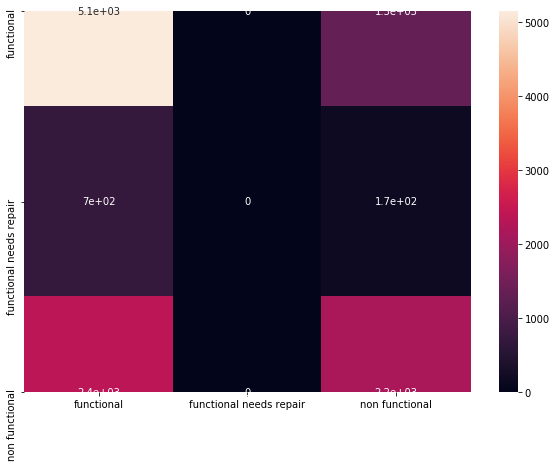

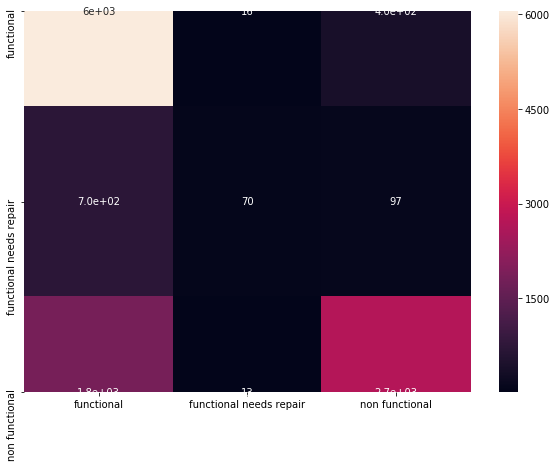

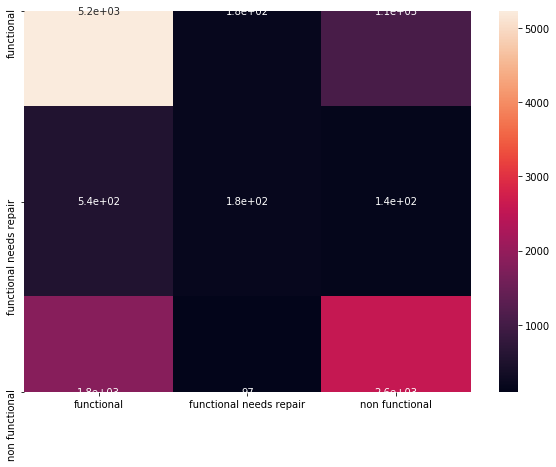

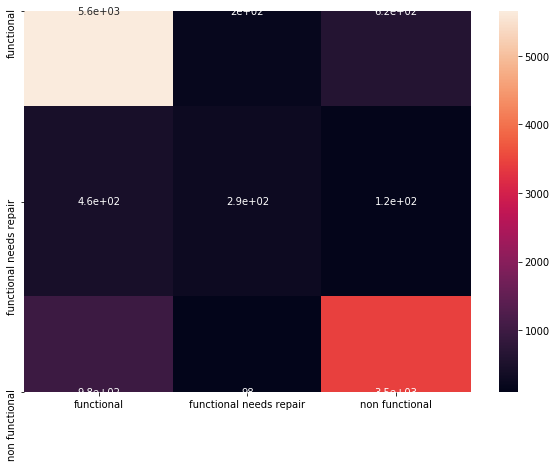

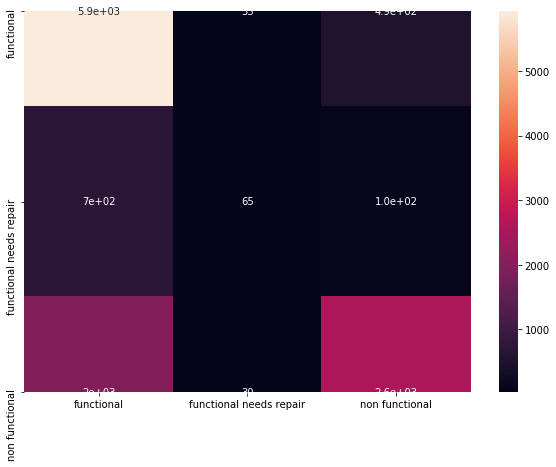

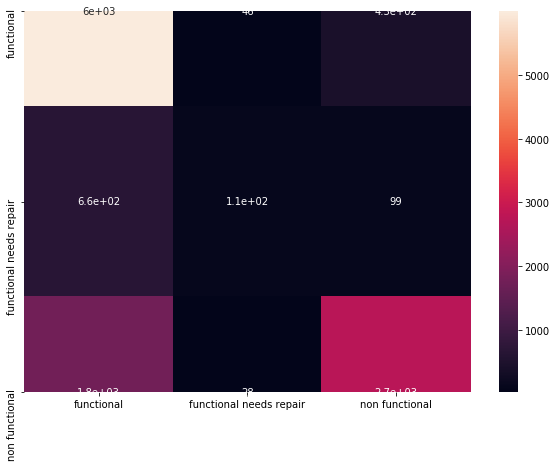

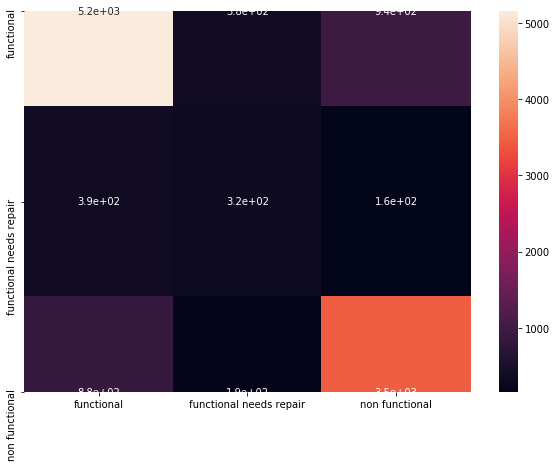

In [26]:
for x in indices:
    confuse(results, x)

In [27]:
result = [[x[i] for x in results] for i in range(5)]

In [28]:
clf_names, score, train_time, test_time, matricies = [[x for x in result[i]] for i in range(5)]

In [29]:
np.max(train_time) / np.max(test_time)

29.550987999217657

In [30]:
train_time = np.array(train_time) / np.max(train_time)
test_time = np.array(test_time) / (np.max(test_time))

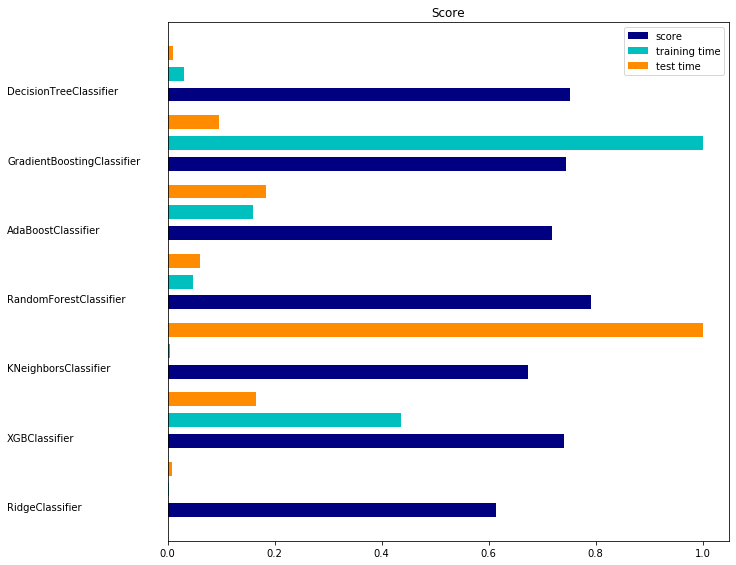

In [31]:
plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, train_time, .2, label="training time",color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for a, b in zip(indices, clf_names):
    plt.text(-.3, a, b)
plt.show()